In [58]:
import numpy as np
import pandas as pd

In [59]:
def mse(y, y1):
    error = y - y1
    return np.mean(error ** 2)

In [60]:
class ScratchLinearRegression():
    """
    Scratch implementation of linear regression
    
    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process
    
    Attributes
    ----------
    self.coef_ : of the following form. ndarray, shape (n_features,)
      Parameters
    self.loss : of the following form. ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : of the following form. ndarray, shape (self.iter,)
      Record loss on validation data
    """
    
    def __init__(self, num_iter, lr, no_bias, verbose):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def _linear_hypothesis(self, X):
        """
        Compute a linear hypothetical function

        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
          Training data

        Returns
        -------
          of the following form. ndarray, shape (n_samples, 1)
          Estimated result by linear hypothetical function

        """
        x1 = X

        if self.no_bias:
            x0 = np.zeros(x1.shape[0])
        else:
            x0 = np.ones(x1.shape[0])
            
        return np.concatenate([x0.reshape(-1,1), x1], axis=1)
    
    
    def _gradient_descent(self, X, error):
        """
        Optimize the error using the gradient decent and update the theta values(weights)
        
        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
          Training data
          
        error: of the following form. ndarray, shape (n_samples, 1)

        """
        

        self.theta = self.theta - self.lr * np.dot(error, X)/len(X)
        

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn linear regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.
        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
            Features of training data
        y : of the following form. ndarray, shape (n_samples, )
            Correct answer value of training data
        X_val : of the following form. ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : of the following form. ndarray, shape (n_samples, )
            Correct value of verification data
        """

        x1 = self._linear_hypothesis(X)
        
        self.theta = np.random.random(x1.shape[1])
        
        for i in range(self.iter):
            y1 = np.dot(x1, self.theta)

            #compute the loss function
            error = y1 - y
            self.loss[i] += mse(y, y1)/2

            # if x_val is entered, fit to it
            if isinstance(X_val, np.ndarray):
                x2 = self._linear_hypothesis(X_val)
                y2 = np.dot(x2, self.theta)
                error_val = y2 - y_val
                self.val_loss[i] += mse(y2, y_val)/2


            # optimize the objective function using gradient descent
            self._gradient_descent(x1, error)

            if self.verbose:
                #Output learning process when verbose is set to True
                print("n_iter: ", i,
                    "loss: ", self.loss[i],
                    "theta: ", self.theta)

        
    def predict(self, X):
        """
        Estimate using linear regression.
        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            of the following form. ndarray, shape (n_samples, 1)
            Estimated result by linear regression
        """
        return np.dot(self._linear_hypothesis(X), self.theta)

## Problem Six: Learning and Estimation

In [61]:
import pandas as pd

df = pd.read_csv("train.csv")
X = df[["YearBuilt"]].values
y = df[["SalePrice"]].values.reshape(-1)
print(X.shape)
print(y.shape)

(1460, 1)
(1460,)


In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1168, 1)
(1168,)
(292, 1)
(292,)


In [63]:
# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [64]:
reg1 = ScratchLinearRegression(10000, 0.0001, False, True)
reg1.fit(X_train_std, y_train, X_test_std, y_test)
y_pred1 = reg1.predict(X_test_std)
y_pred1

n_iter:  0 loss:  19424284440.21372 theta:  [18.59811103  4.85031823]
n_iter:  1 loss:  19420848170.752716 theta:  [36.67714111  8.93982604]
n_iter:  2 loss:  19417412588.511246 theta:  [54.7543633  13.02892489]
n_iter:  3 loss:  19413977693.351856 theta:  [72.82977776 17.11761483]
n_iter:  4 loss:  19410543485.13716 theta:  [90.90338468 21.2058959 ]
n_iter:  5 loss:  19407109963.729763 theta:  [108.97518424  25.29376814]
n_iter:  6 loss:  19403677128.992313 theta:  [127.04517661  29.3812316 ]
n_iter:  7 loss:  19400244980.787483 theta:  [145.11336199  33.46828631]
n_iter:  8 loss:  19396813518.97797 theta:  [163.17974055  37.55493232]
n_iter:  9 loss:  19393382743.426502 theta:  [181.24431248  41.64116966]
n_iter:  10 loss:  19389952653.99584 theta:  [199.30707794  45.72699837]
n_iter:  11 loss:  19386523250.548763 theta:  [217.36803713  49.81241851]
n_iter:  12 loss:  19383094532.948082 theta:  [235.42719023  53.8974301 ]
n_iter:  13 loss:  19379666501.056633 theta:  [253.48453741  5

array([102480.81371335,  88870.5903173 ,  96526.34097758, 119493.5929584 ,
       114389.75918488,  62500.78248748, 145012.76182597,  85468.03446829,
       135655.73324119, 142460.84493922, 144162.12286372, 118642.95399614,
       138207.65012795, 110987.20333587,  94825.06305307, 102480.81371335,
       132253.17739218, 133954.45531669, 110136.56437362,  66753.97729874,
        98227.61890208, 142460.84493922, 107584.64748686, 133954.45531669,
       116941.67607164,  38682.8915444 , 139058.28909021, 113539.12022263,
       145012.76182597,  93974.42409082, 103331.4526756 , 133103.81635444,
       120344.23192065, 139058.28909021, 145863.40078823, 135655.73324119,
       143311.48390147, 115240.39814713, 141610.20597696, 133954.45531669,
        96526.34097758, 100779.53578884, 143311.48390147, 142460.84493922,
       134805.09427894, 108435.28644911, 100779.53578884, 118642.95399614,
       120344.23192065,  93123.78512857, 141610.20597696, 109285.92541137,
       119493.5929584 ,  

[]

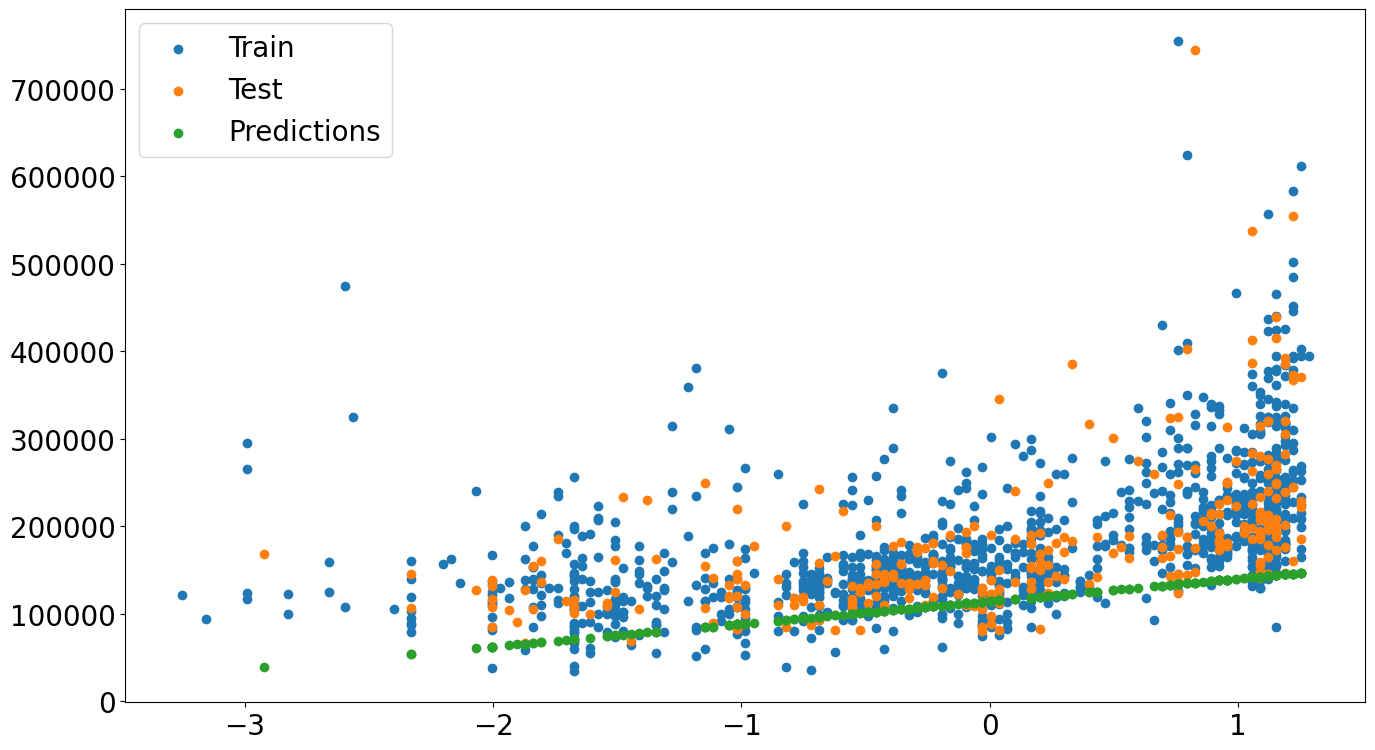

In [65]:
import matplotlib.pyplot as plt

fig = plt.subplots(figsize=(16, 9))
plt.rcParams["font.size"] = 20

plt.scatter(X_train_std, y_train, label="Train")
plt.scatter(X_test_std, y_test, label="Test")
plt.scatter(X_test_std, y_pred1, label="Predictions")
plt.legend()
plt.plot()

In [66]:
# Checking our model's performance using the MSE and RMSE metrics
mse_val = mse(y_test, y_pred1)
print(f"MSE: {mse_val}")
print(f"RMSE: {np.sqrt(mse_val):.1f}")

MSE: 9610118426.50643
RMSE: 98031.2


In [67]:
# Comparing with sklearn
from sklearn.linear_model import LinearRegression

reg2 = LinearRegression()
reg2.fit(X_train_std, y_train)
y_pred_sk = reg2.predict(X_test_std)

[]

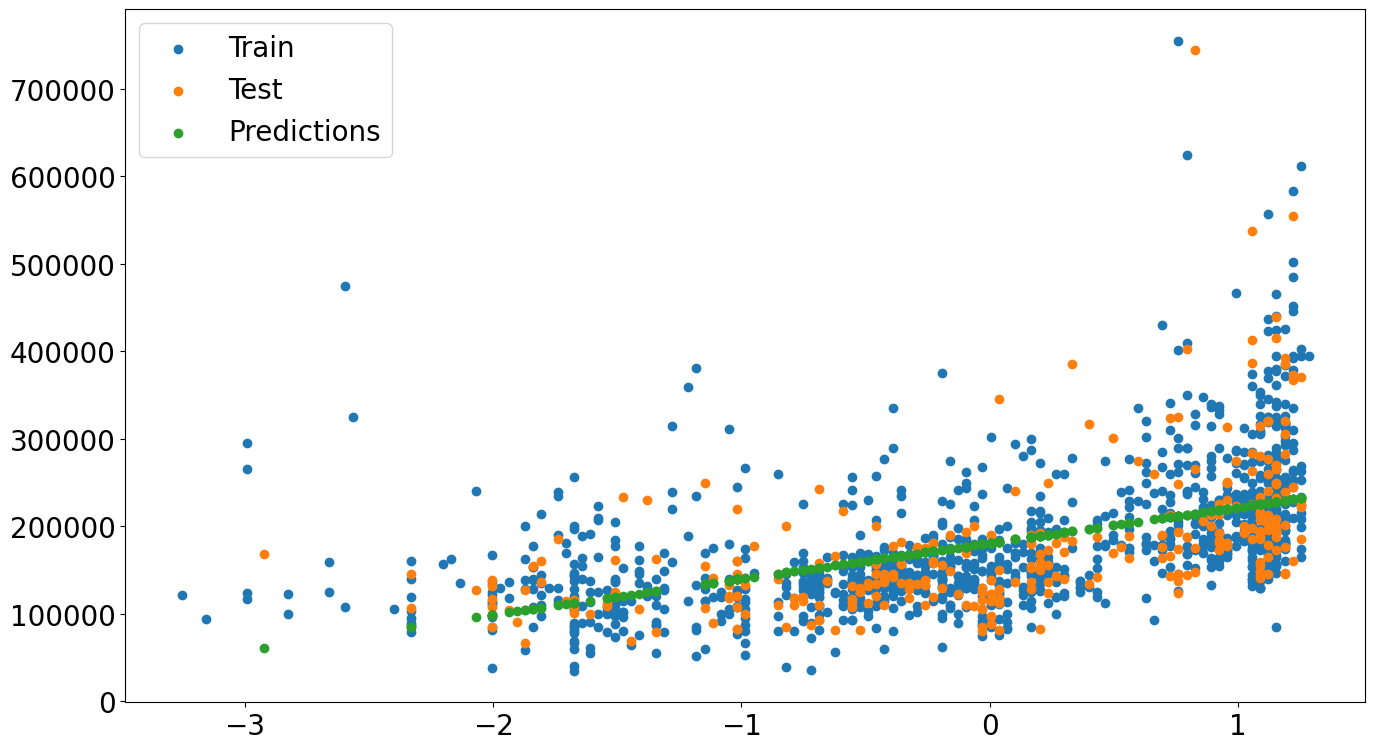

In [68]:
fig = plt.subplots(figsize=(16, 9))
plt.rcParams["font.size"] = 20

plt.scatter(X_train_std, y_train, label="Train")
plt.scatter(X_test_std, y_test, label="Test")
plt.scatter(X_test_std, y_pred_sk, label="Predictions")
plt.legend()
plt.plot()

In [69]:
# Checking the Sklearn model's performance using the MSE and RMSE metrics
mse_sk = mse(y_test, y_pred_sk)
print(f"MSE: {mse_sk}")
print(f"RMSE: {np.sqrt(mse_sk):.1f}")

MSE: 4980069536.617275
RMSE: 70569.6


## Problem Seven: Plotting the learning curve

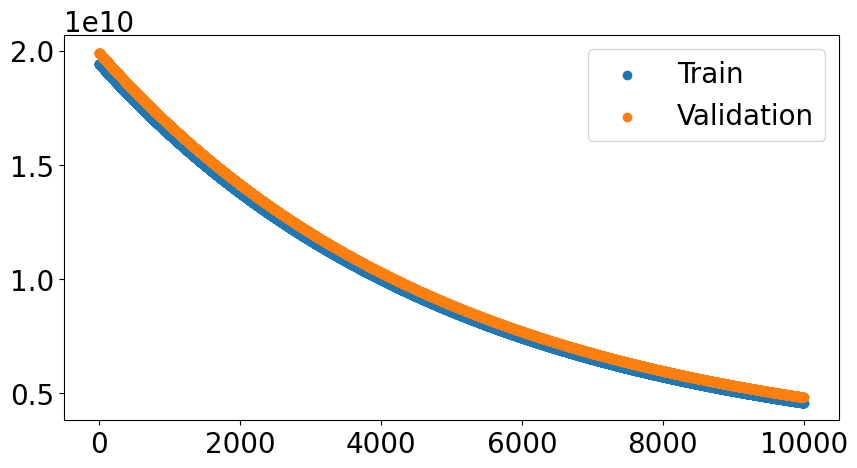

In [70]:
def display_learning_curve(loss, val_loss):
    fig = plt.subplots(figsize=(10, 5))
    plt.rcParams["font.size"] = 20
    
    plt.scatter(range(len(loss)), loss, label="Train")
    plt.scatter(range(len(val_loss)), val_loss, label="Validation")
    plt.legend()
    plt.plot()

display_learning_curve(loss = reg1.loss, val_loss= reg1.val_loss)

## Problem Eight: (Advance task) Removal of bias term

In [71]:
# To remove the bias term, we set the no_bias parameter to True
reg2 = ScratchLinearRegression(10000, 0.001, True, True)
reg2.fit(X_train_std, y_train, X_test_std, y_test)
y_pred2 = reg2.predict(X_test_std)
y_pred2

n_iter:  0 loss:  19424394062.15532 theta:  [ 0.09930394 41.26644725]
n_iter:  1 loss:  19422722124.415512 theta:  [ 0.09930394 82.12510914]
n_iter:  2 loss:  19421053528.879246 theta:  [9.93039380e-02 1.22942912e+02]
n_iter:  3 loss:  19419388268.865463 theta:  [9.93039380e-02 1.63719898e+02]
n_iter:  4 loss:  19417726337.706448 theta:  [9.93039380e-02 2.04456106e+02]
n_iter:  5 loss:  19416067728.747814 theta:  [9.93039380e-02 2.45151578e+02]
n_iter:  6 loss:  19414412435.348484 theta:  [9.93039380e-02 2.85806355e+02]
n_iter:  7 loss:  19412760450.880672 theta:  [9.93039380e-02 3.26420477e+02]
n_iter:  8 loss:  19411111768.729805 theta:  [9.93039380e-02 3.66993985e+02]
n_iter:  9 loss:  19409466382.294556 theta:  [9.93039380e-02 4.07526919e+02]
n_iter:  10 loss:  19407824284.98679 theta:  [9.93039380e-02 4.48019321e+02]
n_iter:  11 loss:  19406185470.231544 theta:  [9.9303938e-02 4.8847123e+02]
n_iter:  12 loss:  19404549931.467 theta:  [9.93039380e-02 5.28882687e+02]
n_iter:  13 los

array([ -18690.61084931,  -40219.83518067,  -28109.64649428,
          8220.91956488,     147.46044063,  -81932.70732267,
         48588.21518618,  -45602.1412635 ,   33786.87345837,
         44551.48562405,   47242.63866547,    6875.34304417,
         37823.6030205 ,   -5234.84564221,  -30800.7995357 ,
        -18690.61084931,   28404.56737553,   31095.72041695,
         -6580.42216292,  -75204.82471912,  -25418.49345286,
         44551.48562405,  -10617.15172505,   31095.72041695,
          4184.19000275, -119608.84990254,   39169.17954121,
         -1198.11608008,   48588.21518618,  -32146.37605641,
        -17345.0343286 ,   29750.14389624,    9566.49608559,
         39169.17954121,   49933.79170688,   33786.87345837,
         45897.06214476,    1493.03696134,   43205.90910334,
         31095.72041695,  -28109.64649428,  -21381.76389073,
         45897.06214476,   44551.48562405,   32441.29693766,
         -9271.57520434,  -21381.76389073,    6875.34304417,
          9566.49608559,

[]

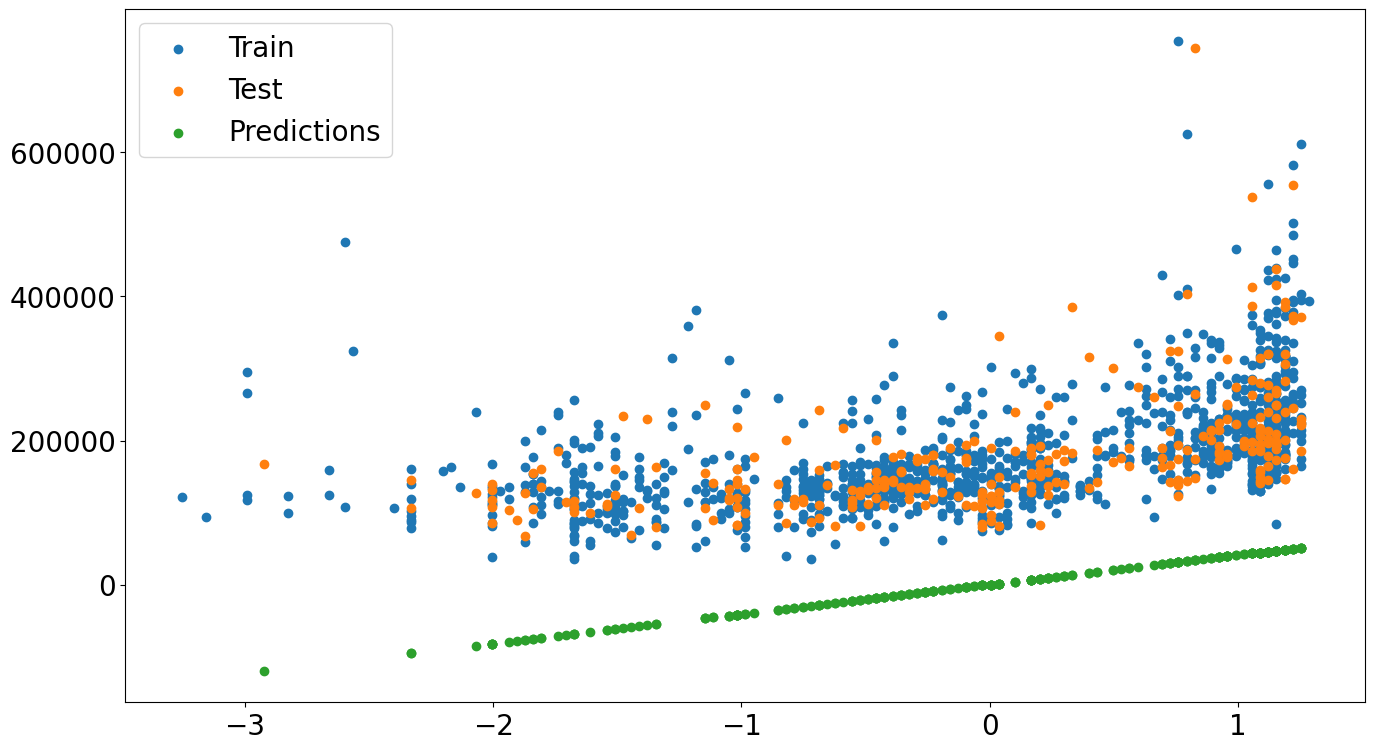

In [72]:
fig = plt.subplots(figsize=(16, 9))
plt.rcParams["font.size"] = 20

plt.scatter(X_train_std, y_train, label="Train")
plt.scatter(X_test_std, y_test, label="Test")
plt.scatter(X_test_std, y_pred2, label="Predictions")
plt.legend()
plt.plot()

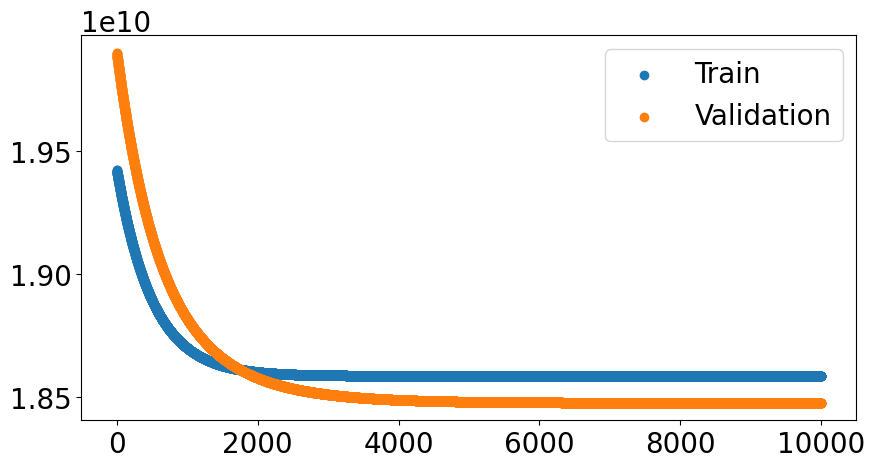

In [73]:
display_learning_curve(loss = reg2.loss, val_loss= reg2.val_loss)

In [74]:
# Checking our model's performance using the MSE and RMSE metrics
mse_2 = mse(y_test, y_pred2)
print(f"MSE: {mse_2}")
print(f"RMSE: {np.sqrt(mse_2):.1f}")

MSE: 36956808562.95993
RMSE: 192241.5


Training our regression model when the bias term is removed forces our regression line to cut through the origin (0, 0), this causes the regression line to have a different slope and intercept compared to a model with the bias term. The absence of the bias term can make the model more sensitive to outliers. Since the regression line must pass through the origin, outliers can have a larger impact on the slope of the line, potentially leading to overfitting. The difference in the learning curve of the regression model without a bias term shows that the training dataset is learning at a different rate from the test dataset, proving that the model isn't learning well.

## Problem Nine: (Advance task) Multidimensional feature quantity

In [75]:
df = pd.read_csv("train.csv")
X = df[["YearBuilt", "YearBuilt"]].values
y = df[["SalePrice"]].values.reshape(-1)

# Taking the square of X for input
X[:, 1] = X[:, 1]**2
print(X[0])
print(X.shape)
print(y.shape)

[   2003 4012009]
(1460, 2)
(1460,)


In [76]:
# Splitting the X and y data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1168, 2)
(1168,)
(292, 2)
(292,)


In [77]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [78]:
reg3 = ScratchLinearRegression(5000, 0.01, False, True)
reg3.fit(X_train_std, y_train, X_test_std, y_test)
y_pred3 = reg3.predict(X_test_std)
y_pred3

n_iter:  0 loss:  19424343932.460617 theta:  [1808.1054984   409.56455968  411.77657757]
n_iter:  1 loss:  19065790108.788395 theta:  [3598.11343314  810.35057905  814.42084172]
n_iter:  2 loss:  18715026893.004494 theta:  [5370.22128853 1203.1024397  1209.03094648]
n_iter:  3 loss:  18371873299.018475 theta:  [7124.60806537 1587.98082192 1595.76757215]
n_iter:  4 loss:  18036152970.083424 theta:  [8861.45097445 1965.14319248 1974.7881855 ]
n_iter:  5 loss:  17707694045.975018 theta:  [10580.92545443  2334.74386885  2346.24710399]
n_iter:  6 loss:  17386329034.42531 theta:  [12283.20518961  2696.93408222  2710.29555882]
n_iter:  7 loss:  17071894686.662699 theta:  [13968.46212744  3051.86203921  3067.08175659]
n_iter:  8 loss:  16764231876.91516 theta:  [15636.86649589  3399.67298234  3416.75093985]
n_iter:  9 loss:  16463185485.73893 theta:  [17288.58682066  3740.50924936  3759.44544633]
n_iter:  10 loss:  16168604287.040052 theta:  [18923.78994218  4074.51033129  4095.30476706]
n_ite

array([161866.48353566, 140372.35989459, 152449.52342219, 188885.92117845,
       180762.38185828,  99034.64529037, 229731.29241651, 135015.69377226,
       214710.5970374 , 225629.67969492, 228363.66655628, 187530.94390918,
       218802.09088623, 175355.12137213, 149762.75796705, 161866.48353566,
       209261.1745814 , 211985.04257   , 174004.36029984, 105674.61333323,
       155137.97535612, 225629.67969492, 169954.60680116, 211985.04257   ,
       184822.25422972,  62045.61255106, 220166.76540857, 179409.93430719,
       229731.29241651, 148420.00766903, 163213.45003066, 210622.89776585,
       190241.32006743, 220166.76540857, 231099.33989644, 214710.5970374 ,
       226996.46231575, 182115.25102906, 224263.31869378, 211985.04257   ,
       152449.52342219, 159173.81540475, 226996.46231575, 225629.67969492,
       213347.60899385, 171304.10301435, 159173.81540475, 187530.94390918,
       190241.32006743, 147077.67899071, 224263.31869378, 172654.02084725,
       188885.92117845, 1

[]

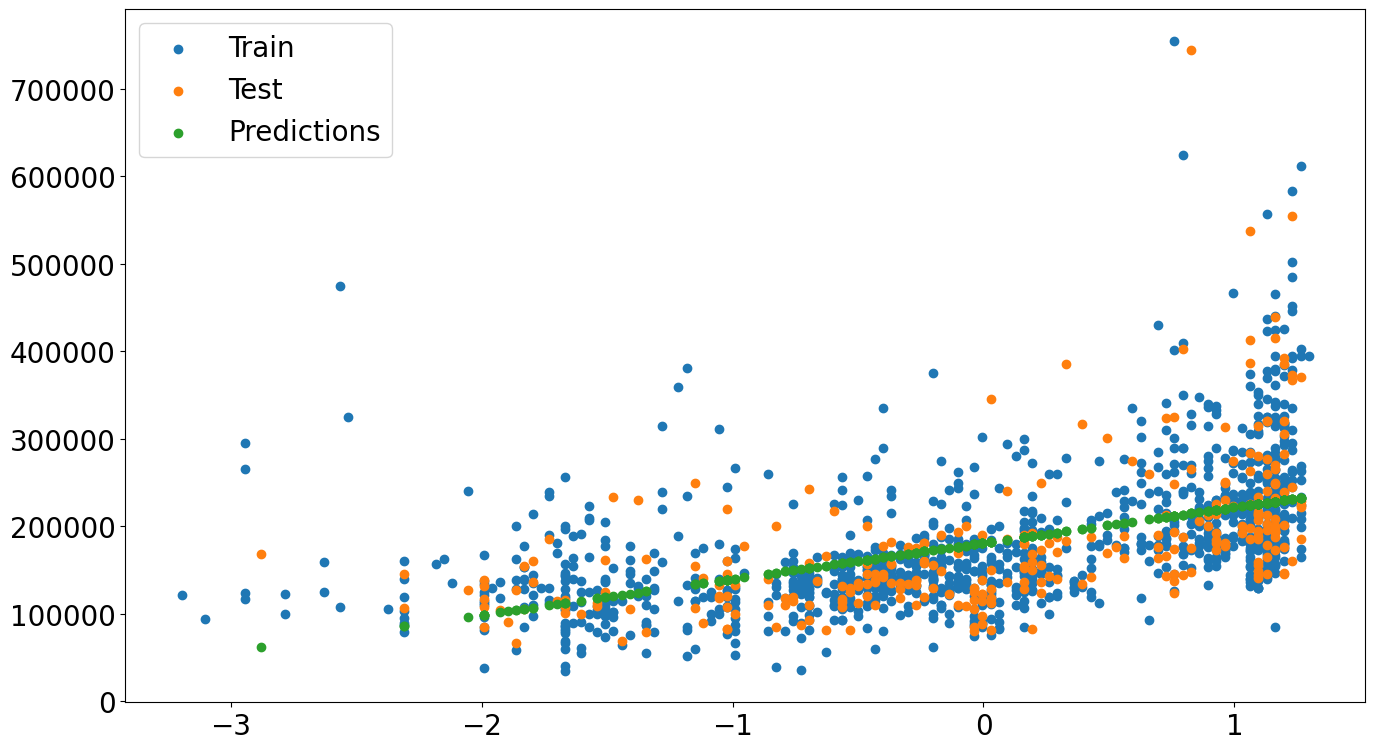

In [79]:
fig = plt.subplots(figsize=(16, 9))
plt.rcParams["font.size"] = 20

plt.scatter(X_train_std[:,1], y_train, label="Train")
plt.scatter(X_test_std[:,1], y_test, label="Test")
plt.scatter(X_test_std[:,1], y_pred3, label="Predictions")
plt.legend()
plt.plot()

In [80]:
# Checking our model's performance using the MSE and RMSE metrics
mse_3 = mse(y_test, y_pred3)
print(f"MSE: {mse_3}")
print(f"RMSE: {np.sqrt(mse_3):.1f}")

MSE: 4971463620.880682
RMSE: 70508.6


In [81]:
# generating a cubic feature and experimenting with it
df = pd.read_csv("train.csv")
X = df[["YearBuilt", "YearBuilt", "YearBuilt"]].values
y = df[["SalePrice"]].values.reshape(-1)

# Taking the square of X for input
X[:, 1] = X[:, 1]**2

# Taking the cube of X for input
X[:, 2] = X[:, 2]**3
print(X[0])
print(X.shape)
print(y.shape)

[      2003    4012009 8036054027]
(1460, 3)
(1460,)


In [82]:
# Splitting the X and y data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1168, 3)
(1168,)
(292, 3)
(292,)


In [83]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [84]:
reg4 = ScratchLinearRegression(5000, 0.01, False, True)
reg4.fit(X_train_std, y_train, X_test_std, y_test)
y_pred4 = reg4.predict(X_test_std)
y_pred4

n_iter:  0 loss:  19424262508.30582 theta:  [1808.47949589  409.57146987  411.65683312  413.08065874]
n_iter:  1 loss:  19049105422.73719 theta:  [3598.48369066  806.22839764  810.17156455  813.41329608]
n_iter:  2 loss:  18683368866.943726 theta:  [5370.58784348 1190.93099367 1196.73153601 1201.79159422]
n_iter:  3 loss:  18326749842.162224 theta:  [7124.97095477 1564.037871   1571.69537333 1578.57416626]
n_iter:  4 loss:  17978958206.822556 theta:  [8861.81023495 1925.8968848  1935.41094404 1944.10886745]
n_iter:  5 loss:  17639716017.20208 theta:  [10581.28112232  2276.84545508  2288.21568019  2298.73311785]
n_iter:  6 loss:  17308756905.045975 theta:  [12283.55730083  2617.21087973  2630.4368913   2642.77421542]
n_iter:  7 loss:  16985825490.008781 theta:  [13968.81071754  2947.31063816  2962.39206809  2976.54963962]
n_iter:  8 loss:  16670676824.898256 theta:  [15637.21160009  3267.45268587  3284.38917702  3300.36734602]
n_iter:  9 loss:  16363075871.821302 theta:  [17288.92847382

array([161542.52321781, 140118.35808302, 152138.22708466, 188680.83925759,
       180497.40098216,  99327.35946306, 230140.81818702, 134801.89849352,
       214833.44641431, 225953.93726237, 228744.17797978, 187314.43006079,
       218996.04881193, 175061.77457603, 149460.21464319, 161542.52321781,
       209297.44046785, 212063.42608791, 173705.36428382, 105842.81632501,
       154820.20550543, 225953.93726237, 169642.11830163, 212063.42608791,
       184584.61621975,  63290.27217722, 220385.60368193, 179136.99581405,
       230140.81818702, 148122.69468846, 162889.96788317, 210679.92913483,
       190048.25049257, 220385.60368193, 231538.47214727, 214833.44641431,
       227348.55113506, 181858.80584549, 224560.3359712 , 212063.42608791,
       152138.22708466, 158850.61618145, 227348.55113506, 225953.93726237,
       213447.93171757, 170995.53653711, 158850.61618145, 187314.43006079,
       190048.25049257, 146786.16505708, 224560.3359712 , 172349.95173434,
       188680.83925759, 1

[]

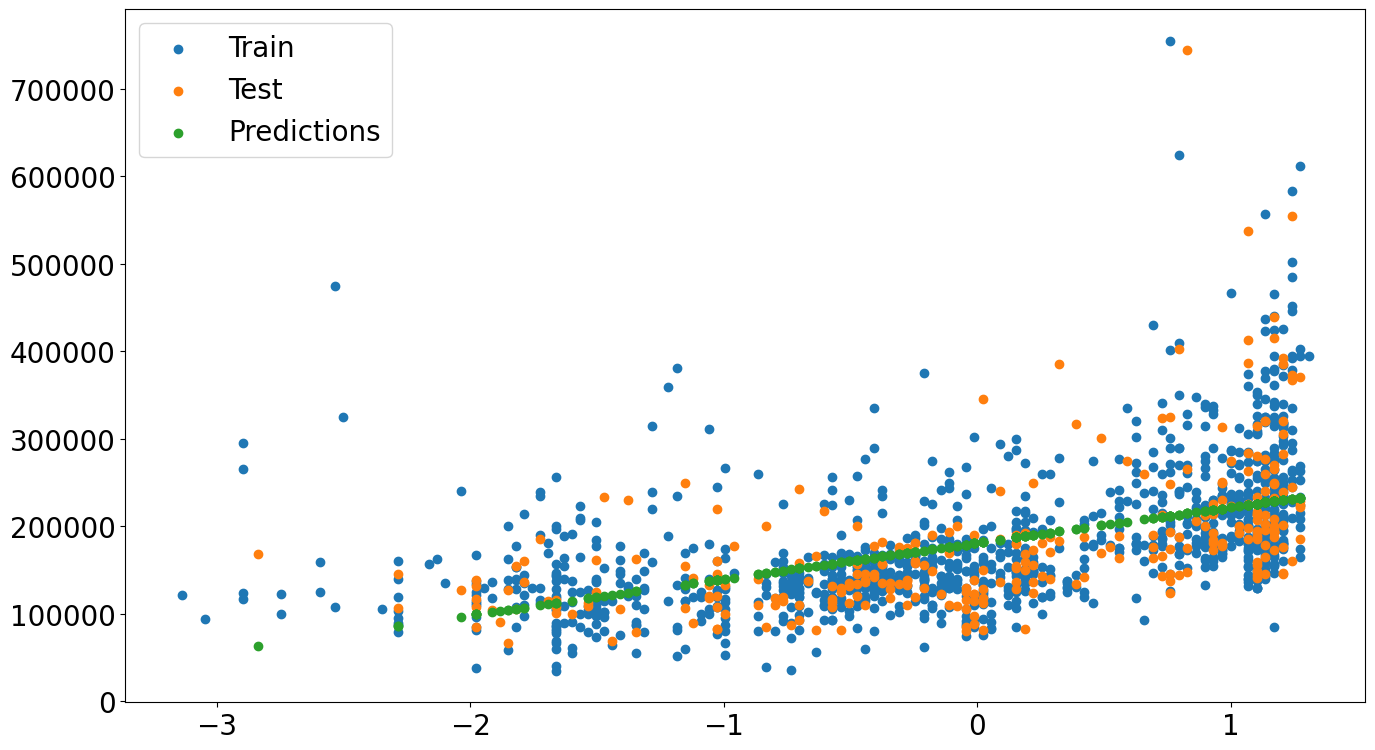

In [85]:
fig = plt.subplots(figsize=(16, 9))
plt.rcParams["font.size"] = 20

plt.scatter(X_train_std[:,2], y_train, label="Train")
plt.scatter(X_test_std[:,2], y_test, label="Test")
plt.scatter(X_test_std[:,2], y_pred4, label="Predictions")
plt.legend()
plt.plot()

In [86]:
# Checking our model's performance using the MSE and RMSE metrics
mse4 = mse(y_test, y_pred4)
print(f"MSE: {mse4}")
print(f"RMSE: {np.sqrt(mse4):.1f}")

MSE: 4960227251.308751
RMSE: 70428.9


The number of theta values in the model increases with respect to an increament in the number of features.

## Problem Ten: (Advance task) Derivation of update formula

Proving the formula: $ 

To derive the following $⍬j =  ⍬_{j} - ⍺ \frac{1}{m} \sum_{i=1}^m h⍬((x) - y_{i}) x_{j}$(gradient descent formula), we start by taking the derivative of the loss function, $ J(⍬) = \frac{1}{2m}\sum_{i=1}^m [h_{⍬}(x^{(i)}) - y^{(i)}]^2 $,  with respect to the weights($⍬_{j}$). The resulting values represent the new weights and are then multiplied by the learning rate, this product serves as the step size of the  descent to the loss function's minima. Finally, in order to ensure that we're descending the slope rather than ascending, we update the ⍬ values by subtracting the step size from the old ⍬ values. Capturing the above steps in an equation, we get; $ \theta_{j} - ⍺\frac{𝚫J(⍬)}{𝚫⍬_{j}} $, let's call this equation 1.

Following these steps:
First, let's simplify J(⍬):
$J(⍬) = \frac{1}{2m}\sum_{i=1}^m (h_{⍬}x^{(i)})^2 - 2y^{(i)}h_{⍬}x^{(i)} + (y^{(i)})^2 $

Next, we differentiate J(⍬) with respect to ⍬, this yields:
$ \frac{𝚫J(⍬)}{𝚫⍬_{j}} = \frac{1}{2m}\sum_{i=1}^m 2h_{⍬}(x^{(i)})^2 - 2y^{(i)}x^{(i)} $

Simplifying, we get: $ \frac{𝚫J(⍬)}{𝚫⍬_{j}} = \frac{1}{m}\sum_{i=1}^m h_{⍬}(x^{(i)})^2 - y^{(i)}x^{(i)} $

Factorizing, we get: $ \frac{𝚫J(⍬)}{𝚫⍬_{j}} = \frac{1}{m}\sum_{i=1}^m x_{j}^{(i)}(h_{⍬}x^{(i)} - y^{(i)}) $. We shall refer to this as equation 2.

Now plugging $ \frac{𝚫J(⍬)}{𝚫⍬_{j}} $ into our equation 1, we get:
$ \theta_{j} - ⍺\frac{1}{m}\sum_{i=1}^m x_{j}^{(i)}(h_{⍬}x^{(i)} - y^{(i)}) $

## Problem Eleven: (Advance task) Problem of local optimum solution

With linear regression, you can always find the optimal solution when optimizing the objective function if you continue learning. To understand this, let's break down some concepts:

**Convex Nature of Linear Regression**:
   In linear regression, the objective function (such as the sum of squared errors) is convex. This means that its graph forms a "bowl" shape with a single global minimum and no local minima.

**Mathematical Formulation**:
   The objective function in linear regression, typically the sum of squared errors (SSE), can be represented mathematically as:

   $ SSE = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $

   Where $y_{i}$ is the actual value and $\hat{y}_i$ is the predicted value. This objective function is usually convex.

**Optimization with Gradient Descent**:
   Gradient descent, when applied to linear regression, aims to minimize the SSE by iteratively updating the parameters (coefficients of the linear model) until convergence.

**Convex Graph**:
   The convex nature of the SSE graph ensures that there is only one global minimum, making it straightforward for gradient descent to find the optimal solution. Here's a conceptual representation of a convex graph:

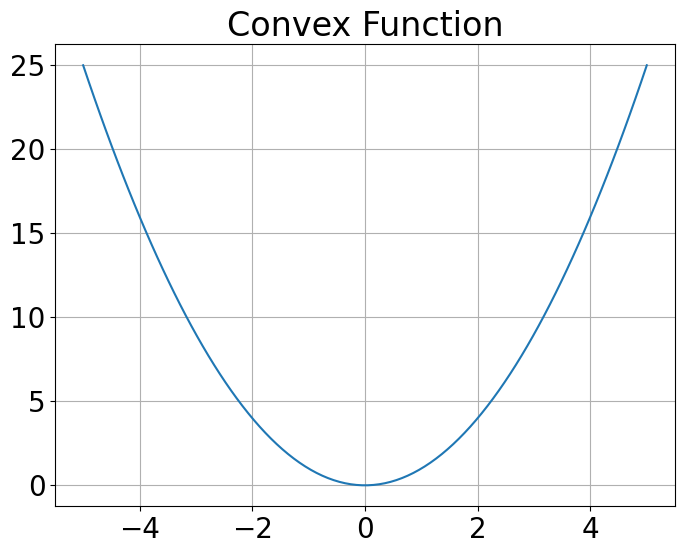

In [87]:
# Define a convex function
def convex_function(x):
    return x**2

# Generate data points for plotting
x_values = np.linspace(-5, 5, 100)
y_values = convex_function(x_values)

# Plot the convex function
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Convex Function')
plt.title('Convex Function')
plt.grid(True)
plt.show()

As you can see, there's only one minimum point, making it easy for gradient descent to converge to the optimal solution regardless of the starting point.

In summary, the convex nature of the objective function in linear regression guarantees that there's only one global minimum, eliminating the problem of locally optimal solutions. This makes it possible for gradient descent to always find the optimal solution with continued learning.